# JAX Workshop (Solutions)

## The problem

Bitney is a new student. He would like to get some help with navigating around the campus. Every day he decides how many hours he is planning to spend around. There are $K=5$ types of facilities he uses:

- 0: Library
- 1: Lecture theatre
- 2: Mensa
- 3: Park
- 4: Sports centre

For example, on Monday he decided to spend five hours on campus, with his trajectory being

$\mathbf{X}_\text{Monday} = (0, 0, 2, 3, 0)$,

meaning that he first spent two hours at the library, then one hour at the mensa, followed by one hour in the nearby park, and then spent another hour at the library.

On Tuesday he spent eight hours on campus:

$\mathbf{X}_\text{Tuesday} = (2, 1, 1, 2, 1, 0, 0, 4)$.

Bitney collected the data from several days and now would like to understand better his behaviour if he plans to spend $n$ hours at the campus.
For example, he would like to predict:

  - How likely is that he'll visit park?
  - How many hours will he spend in the library?
  - How many different buildings will he visit?

We will help him by building a generative model simulating his past (and, hopefully, future) days.

In [ ]:
import jax
import jax.numpy as jnp

TRAJECTORIES = [[0, 1], [1, 3], [0, 0], [1, 1], [1, 1], [2, 0], [4, 3], [2, 1], [0, 0], [0, 2], [0, 0, 0], [1, 0, 1], [4, 0, 0], [4, 0, 3], [1, 3, 0], [4, 4, 3, 0], [1, 1, 1, 3], [4, 1, 0, 0], [4, 0, 0, 0], [2, 1, 0, 1], [1, 4, 4, 1, 1], [1, 1, 0, 2, 0], [1, 0, 1, 1, 0], [3, 1, 2, 3, 1], [2, 3, 0, 1, 0], [2, 0, 1, 0, 0], [2, 1, 3, 0, 0], [0, 4, 0, 0, 0], [4, 0, 0, 0, 1, 0], [0, 2, 1, 0, 0, 0], [0, 1, 2, 1, 1, 1], [1, 0, 0, 0, 4, 4], [1, 3, 1, 4, 1, 0], [1, 1, 0, 1, 2, 1], [1, 4, 4, 1, 4, 0], [1, 1, 1, 1, 3, 0], [2, 3, 0, 2, 3, 1], [0, 0, 0, 1, 1, 4], [1, 4, 4, 3, 1, 0], [4, 1, 3, 0, 0, 0], [4, 4, 1, 4, 0, 1], [4, 1, 1, 0, 0, 1], [2, 3, 1, 1, 1, 0], [1, 1, 1, 3, 1, 3], [1, 0, 0, 1, 0, 4], [0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0], [2, 1, 0, 0, 0, 1], [4, 4, 4, 0, 0, 0, 4], [4, 0, 1, 0, 0, 1, 0], [2, 3, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0], [1, 3, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 4], [0, 0, 1, 1, 1, 1, 2], [4, 0, 1, 1, 0, 0, 0], [2, 0, 0, 0, 1, 4, 4], [1, 4, 0, 1, 1, 1, 0], [1, 1, 0, 2, 1, 3, 0], [1, 0, 3, 4, 0, 0, 1], [2, 1, 1, 1, 3, 1, 1], [1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 4, 3], [1, 0, 0, 4, 1, 1, 2], [2, 1, 0, 0, 2, 0, 0], [2, 0, 1, 0, 2, 3, 4], [4, 0, 0, 0, 4, 4, 0], [1, 1, 1, 3, 1, 4, 1], [4, 1, 2, 3, 1, 3, 0], [1, 3, 1, 1, 0, 0, 1], [1, 0, 4, 1, 4, 1, 0], [1, 0, 0, 0, 1, 1, 0], [1, 0, 0, 3, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 4, 1, 0, 0], [0, 3, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 1, 0], [4, 0, 0, 0, 1, 0, 0, 1], [4, 3, 4, 0, 1, 0, 0, 0], [2, 1, 1, 0, 0, 0, 4, 1], [2, 0, 2, 3, 4, 1, 1, 3], [1, 4, 3, 1, 0, 4, 0, 0], [2, 0, 0, 0, 3, 1, 3, 0], [4, 4, 4, 3, 1, 1, 1, 3], [0, 3, 1, 0, 0, 0, 0, 1], [4, 0, 0, 0, 4, 1, 3, 0], [4, 3, 4, 1, 3, 0, 1, 3], [1, 0, 0, 0, 2, 0, 1, 1], [1, 0, 0, 0, 4, 0, 1, 0], [4, 3, 0, 1, 4, 0, 1, 0, 0, 0, 4], [1, 1, 2, 0, 0, 0, 1, 1, 4, 4, 1], [1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0], [0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 1], [1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0], [1, 2, 0, 0, 0, 4, 1, 0, 0, 0, 1], [1, 3, 1, 1, 4, 4, 4, 0, 0, 0, 1], [4, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], [4, 4, 0, 0, 0, 0, 0, 1, 1, 4, 4], [1, 1, 3, 0, 4, 0, 0, 2, 1, 2, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0], [2, 1, 0, 0, 0, 1, 3, 1, 4, 0, 2, 3], [1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0], [2, 0, 0, 1, 0, 4, 4, 4, 1, 1, 1, 1, 0, 4], [1, 0, 0, 0, 2, 3, 1, 3, 0, 0, 1, 1, 1, 1], [4, 0, 0, 0, 4, 4, 0, 1, 0, 0, 2, 3, 0, 0],]
TRAJECTORIES = [jnp.asarray(tr, dtype=int) for tr in TRAJECTORIES]

**Problem:** How many trajectories have been collected in the data set? How long is the longest trajectory? How long is the shortest trajectory?

In [ ]:
print(len(TRAJECTORIES))
print(max(len(tr) for tr in TRAJECTORIES))
print(min(len(tr) for tr in TRAJECTORIES))

105
14
2


## Markov chains

We will make the following assumptions on the generative process for the sequence $\mathbf{X} = (X_0, ..., X_{n-1})$:
  - Bitney starts at a state $X_0$ chosen at random from the set $\{0, 1, ..., K-1\}$. We allow that some places are more likely to be drawn than others.
  - Bitney selects a new place basing only on the previous place, i.e., $P(X_{t+1} \mid X_t) = P(X_{t+1} \mid X_0, X_1, \dots, X_t)$.
  - The transition matrix $P(X_{t+1} \mid X_t)$ does not depend on $t$ or the total number of hours spent on campus $n$.

In other words, we assume [a time-homogeneous discrete-time Markov chain](https://en.wikipedia.org/wiki/Discrete-time_Markov_chain#Variations).

It is parameterized by:

  - A vector $(\pi_k)$ for $k \in \{0, 1, \dots, K - 1\}$ such that $\pi_1 + \cdots + \pi_{K-1} = 1$. It parameterizes the distribution of the initial states: $P(X_0 = k) = \pi_k$.
  - A matrix $(T_{xy})$ for $x, y \in \{0, 1, \dots, K-1\}$ parameterising the transition matrix. Namely, $P( X_{t+1} = y \mid X_{t} = x ) = T_{xy}$. Note that for each $x$ we have a constraint $T_{x,0} + T_{x,1} + \cdots + T_{x,K-1}=1$.

As typical in statistics and machine learning, it is more convenient to work with log-probabilities, i.e., keep $(\log \pi_k)$ and $(\log T_{xy})$, rather than $(\pi_k)$ and $(T_{xy})$.

Let's simulate some example values, which will be useful for testing purposes:

In [ ]:
key = jax.random.PRNGKey(42)
key, subkey1, subkey2 = jax.random.split(key, 3)

K = 5  # Number of allowed states

# Proportions vector, parameterising P(X_0)
PI = jax.random.dirichlet(subkey1, alpha=2.0 * jnp.ones(K))
# Transition matrix, parameterising P(X_{t+1} | X_t)
TM = jax.random.dirichlet(subkey2, alpha= 2.0 * jnp.ones(K), shape=(K,))

print(PI.sum())
print(TM.sum(axis=1))

LOG_PI = jnp.log(PI)
LOG_TM = jnp.log(TM)

1.0
[1.         1.         1.0000001  1.         0.99999994]


## Log-likelihood

We need to estimate $\pi$ and matrix $T$.
To do this we introduce log-likelihood, describing the logarithm of the probability that a trajectory $\mathbf{X} = (X_0, ..., X_{n-1})$ was sampled from the model with the provided parameters:

$$
    \ell(\pi, T; \mathbf{X}) = \log P( \mathbf{X} \mid \pi, T) = \log \left( P(X_0\mid \pi) \times \prod_{t=1}^{n-1} P(X_t \mid X_{t-1}, T) \right) = \log \pi_{X_0} + \sum_{t=1}^{n-1} \log T_{X_{t-1}, X_t}.
$$

Notice that working with log-probabilities allows us to *sum numbers in reasonable ranges* (we don't expect log-probabilities to be outside of the $-1000$ to $0$ interval), rather than *multiplying a lot of small numbers* (which has a risk to result in $0$, when sufficiently many small floats are multiplied).

**Problem:** Implement the loglikelihood function using the `for` loop in Python.

In [ ]:
from jaxtyping import Int, Float, Array


def loglikelihood_for_loop(
    trajectory: Int[Array, " n"],
    log_tm: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    """Calculates the likelihood for a single trajectory."""

    # raise NotImplementedError("Implement the loglikelihood using the `for` loop.")

    loglike = log_pi[trajectory[0]]
    for i in range(1, len(trajectory)):
        last, current = trajectory[i-1], trajectory[i]
        loglike += log_tm[last, current]

    return loglike

answer = -4.21

print(f"Your implementation gave: {loglikelihood_for_loop(TRAJECTORIES[0], LOG_TM, LOG_PI):.2f}. Should give {answer:.2f}.")

Your implementation gave: -4.21. Should give -4.21.


Nice! This is Python code which you can trust. We can use it as a baseline for testing future improvements. Speaking of which...

### Does JAX like `for` loops?

No. It can tolerate them, but the `for` loops are not really that welcome: they get unrolled into multiple operations.

**Problem:** Compare Jaxprs corresponding to a short and a long trajectory. What can you notice?

In [ ]:
short_trajectory = TRAJECTORIES[0]
long_trajectory = TRAJECTORIES[-1]

print(f"Short trajectory\n================\n{jax.make_jaxpr(loglikelihood_for_loop)(short_trajectory, LOG_TM, LOG_PI)}")

print(f"\n\n\n\nLong trajectory\n=============\n{jax.make_jaxpr(loglikelihood_for_loop)(long_trajectory, LOG_TM, LOG_PI)}")

Short trajectory
{ lambda ; a:i32[2] b:f32[5,5] c:f32[5]. let
    d:i32[1] = slice[limit_indices=(1,) start_indices=(0,) strides=None] a
    e:i32[] = squeeze[dimensions=(0,)] d
    f:bool[] = lt e 0
    g:i32[] = add e 5
    h:i32[] = select_n f e g
    i:f32[1] = dynamic_slice[slice_sizes=(1,)] c h
    j:f32[] = squeeze[dimensions=(0,)] i
    k:i32[1] = slice[limit_indices=(1,) start_indices=(0,) strides=None] a
    l:i32[] = squeeze[dimensions=(0,)] k
    m:i32[1] = slice[limit_indices=(2,) start_indices=(1,) strides=None] a
    n:i32[] = squeeze[dimensions=(0,)] m
    o:bool[] = lt l 0
    p:i32[] = add l 5
    q:i32[] = select_n o l p
    r:bool[] = lt n 0
    s:i32[] = add n 5
    t:i32[] = select_n r n s
    u:f32[1,1] = dynamic_slice[slice_sizes=(1, 1)] b q t
    v:f32[] = squeeze[dimensions=(0, 1)] u
    w:f32[] = add j v
  in (w,) }




Long trajectory
{ lambda ; a:i32[14] b:f32[5,5] c:f32[5]. let
    d:i32[1] = slice[limit_indices=(1,) start_indices=(0,) strides=None] a
    

We are fortunate that Bitney measures time in hours (so that we don't expect sequences longer than 24). But in case he changes the unit to, say, 5 minutes, we will be in a big trouble!
We need to replace the `for` loop using a JAX-native concept.

### Using the `jax.lax.scan` loops

Fortunately, there is a [`jax.lax.scan`](https://jax.readthedocs.io/en/latest/_autosummary/jax.lax.scan.html) loop which can be used here!

Its signature is, roughly, the following:

```python
def scan(f, init, xs):
  carry = init
  ys = []
  
  for x in xs:
    carry, y = f(carry, x)
    ys.append(y)

  return carry, np.stack(ys)
```

We can use it to replace the `for` loop by carrying over the previous state.

#### First example
For example, say that we want to calculate $1^1 + 2^2 + \cdots + 5^5$. We can do it via the `for` loop or an equivalent `jax.lax.scan`:

In [ ]:
s = 0
for i in range(1, 5 + 1):
    s += i**i

print(f"Calculated using `for`: {s}")

def scan_fn(carry, current):
    return carry + jnp.power(current, current), None

s, _ = jax.lax.scan(scan_fn, 0, jnp.arange(1, 5 + 1))

print(f"Calculated using `jax.lax.scan`: {s}")

Calculated using `for`: 3413
Calculated using `jax.lax.scan`: 3413


#### Second example
In the example above we were interested in just the last sum. What if we wanted to calculate the sums $1^1 + 2^2 + \cdots + n^n$ for all $n\le 5$?

In [ ]:
s = 0
ys = []
for i in range(1, 5 + 1):
    s += i**i
    ys.append(s)

print(f"Calculated using `for`: {ys}")

def scan_fn(carry, current):
    u = carry + jnp.power(current, current)
    return u, u

_, ys = jax.lax.scan(scan_fn, 0, jnp.arange(1, 5 + 1))

print(f"Calculated using `jax.lax.scan`: {ys}")

Calculated using `for`: [1, 5, 32, 288, 3413]
Calculated using `jax.lax.scan`: [   1    5   32  288 3413]


#### Back to our problem

Now we are ready to implement the loglikelihood calculation replacing the `for` loop with an appropriate `jax.lax.scan`.

**Problem:** Write the body of the function:

In [ ]:
def loglikelihood_scan(
    trajectory: Int[Array, " n"],
    log_tm: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    """Calculates the likelihood for a single trajectory using `jax.lax.scan`."""

    def scan_fn(carry, current):
        last, loglike = carry
        loglike += log_tm[last, current]
        return (current, loglike), None

    # The carry will be the previous state and the sum of the previous log-likelihoods
    initial_carry = (trajectory[0], log_pi[trajectory[0]])
    final_carry, _ = jax.lax.scan(scan_fn, initial_carry, trajectory[1:])

    return final_carry[1]


# Test if the implementation agrees with the previous one:
for index in [0, 4, 10, -1]:
    trajectory = TRAJECTORIES[index]
    ll_for = loglikelihood_for_loop(trajectory, LOG_TM, LOG_PI)
    ll_scan = loglikelihood_scan(trajectory, LOG_TM, LOG_PI)
    print(f"Loglikelihood comparison: {ll_for:.2f} =?= {ll_scan:.2f}")

Loglikelihood comparison: -4.21 =?= -4.21
Loglikelihood comparison: -2.37 =?= -2.37
Loglikelihood comparison: -6.10 =?= -6.10
Loglikelihood comparison: -28.41 =?= -28.41


Nice, we have a JAX-compatible loglikelihood!

**Problem:** How does the Jaxpr of the new implementation look like? Does its length changes with the length of the trajectory?

In [ ]:
print(f"Short trajectory\n================\n{jax.make_jaxpr(loglikelihood_scan)(short_trajectory, LOG_TM, LOG_PI)}")

print(f"\n\n\n\nLong trajectory\n=============\n{jax.make_jaxpr(loglikelihood_scan)(long_trajectory, LOG_TM, LOG_PI)}")

Short trajectory
{ lambda ; a:i32[2] b:f32[5,5] c:f32[5]. let
    d:i32[1] = slice[limit_indices=(1,) start_indices=(0,) strides=None] a
    e:i32[] = squeeze[dimensions=(0,)] d
    f:i32[1] = slice[limit_indices=(1,) start_indices=(0,) strides=None] a
    g:i32[] = squeeze[dimensions=(0,)] f
    h:bool[] = lt g 0
    i:i32[] = add g 5
    j:i32[] = select_n h g i
    k:f32[1] = dynamic_slice[slice_sizes=(1,)] c j
    l:f32[] = squeeze[dimensions=(0,)] k
    m:i32[1] = slice[limit_indices=(2,) start_indices=(1,) strides=None] a
    _:i32[] n:f32[] = scan[
      _split_transpose=False
      jaxpr={ lambda ; o:f32[5,5] p:i32[] q:f32[] r:i32[]. let
          s:bool[] = lt p 0
          t:i32[] = add p 5
          u:i32[] = select_n s p t
          v:bool[] = lt r 0
          w:i32[] = add r 5
          x:i32[] = select_n v r w
          y:f32[1,1] = dynamic_slice[slice_sizes=(1, 1)] o u x
          z:f32[] = squeeze[dimensions=(0, 1)] y
          ba:f32[] = add q z
        in (r, ba) }
  

## Total loglikelihood

We have defined the loglikelihood function for a single data point. As in our case we have multiple trajectories, we should use all of them. Assuming that trajectories are independent given the model parameters, we have:
$$
    P\left( \mathbf{X}^{(1)}, \dotsc, \mathbf{X}^{(M)} \mid \pi, T \right) = \prod_{m=1}^M P( \mathbf{X}^{(m)} \mid \pi, T),
$$

so that the total loglikelihood is given by the sum of individual loglikelihoods:


$$
    \ell(\pi, T; \text{all data}) = \sum_{m=1}^M  \ell(\pi, T; \mathbf{X}^{(m)}).
$$

Summation in JAX is easy, isn't it? We can use [`jax.vmap`](https://jax.readthedocs.io/en/latest/_autosummary/jax.vmap.html) to calculate loglikelihoods for individual trajectories and then sum them:

In [ ]:
def calculate_total_loglikelihood_simple_vmap(
    trajectories,
    log_tm: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    # Apply loglikelihood for different trajectories, using the same `log_tm` and `log_pi`:
    lls = jax.vmap(loglikelihood_scan, in_axes=(0, None, None))(trajectories, log_tm, log_pi)
    return jnp.sum(lls)


# Check if it works on a few trajectories
calculate_total_loglikelihood_simple_vmap(
    jnp.asarray(TRAJECTORIES[:5]),
    LOG_TM,
    LOG_PI,
)

Array(-16.214138, dtype=float32)

Let's now calculate the loglikelihood for all trajectories:

In [ ]:
try:
  calculate_total_loglikelihood_simple_vmap(
      jnp.asarray(TRAJECTORIES),
      LOG_TM,
      LOG_PI,
  )
except ValueError as e:
  print(e)

All input arrays must have the same shape.


Oh no, an error! Recall that the `trajectories` is a *list* of arrays which have different lengths. We cannot use `jnp.asarray` to wrap them into a single array...

### The `for` loop to the rescue

Perhaps we should just use the `for` loop to iterate over the trajectories. Of course, the corresponding Jaxpr is going to be scary, but:
  - (a) We'll have a working "baseline" solution, which we can use to test any further improvements.
  - (b) For just a few trajectories this *may actually be fine*. Later we'll learn the padding technique (which is the preferred solution in this case), but which is not universal – you may work on interesting problems in which padding won't be possible. Then one either has to accept a scary Jaxpr or switch to another fast language, which works better with objects of different lengths (e.g., Rust or Julia).

**Problem:** Calculate the total loglikelihood using the `for` loop:

In [ ]:
def calculate_total_loglikelihood_for_loop(
    trajectories: list,
    log_tm: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    s = 0
    for xs in trajectories:
        s += loglikelihood_scan(xs, log_tm, log_pi)
    return s

print(f"Total loglikelihood: {float(calculate_total_loglikelihood_for_loop(TRAJECTORIES, LOG_TM, LOG_PI)):.2f}")

Total loglikelihood: -1357.48


We can check how fast this is:

In [ ]:
%time calculate_total_loglikelihood_for_loop(TRAJECTORIES, LOG_TM, LOG_PI).block_until_ready()

CPU times: user 7.31 s, sys: 150 ms, total: 7.46 s
Wall time: 11.6 s


Array(-1357.4761, dtype=float32)

Ok, this actually takes quite a long time. However, if we know that the trajectories won't change often (e.g., we are using full-batch gradient descent, rather than stochastic gradient descent for optimisation), we can compile with JIT a [partial application](https://en.wikipedia.org/wiki/Partial_application):

In [ ]:
# Fix the first argument
@jax.jit
def f(
    log_tm: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    return calculate_total_loglikelihood_for_loop(TRAJECTORIES, log_tm, log_pi)


# Run it once to compile the function
print(f"Total loglikelihood: {float(f(LOG_TM, LOG_PI)):.2f}")

# Run it several times
%timeit f(LOG_TM, LOG_PI).block_until_ready()

Total loglikelihood: -1357.48
29.1 µs ± 556 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


This is not bad – doing a few millions of gradient steps is manageable.
Before we go any further, let's quickly take a look at another implementation.

### Digression: traversing Pytrees

The `TRAJECTORIES` object is a `list` of arrays. Nested lists, tuples, and dictionaries, which leaves are arrays, are called [Pytrees](https://jax.readthedocs.io/en/latest/pytrees.html).

We can convert a Pytree of trajectories into a Pytree of loglikelihoods using `jax.tree.map` function:

In [ ]:
lls = jax.tree.map(lambda xs: loglikelihood_scan(xs, LOG_TM, LOG_PI), TRAJECTORIES)
print(lls[:4])

[Array(-4.20775, dtype=float32), Array(-3.2719426, dtype=float32), Array(-3.9903703, dtype=float32), Array(-2.3720376, dtype=float32)]


We can sum these numbers by using the `jax.tree.reduce` operation:

In [ ]:
import operator

print(jax.tree.reduce(operator.add, lls, initializer=0.0))
print(sum(lls, 0.0))

-1357.4761
-1357.4761


The corresponding implementation of the total loglikelihood looks then as:

In [ ]:
def calculate_total_loglikelihood_tree_map(
    trajectories: list,
    log_tr: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    lls = jax.tree.map(lambda xs: loglikelihood_scan(xs, log_tr, log_pi), trajectories)
    return jax.tree.reduce(operator.add, lls, initializer=0.0)

@jax.jit
def f(
    log_tm: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    return calculate_total_loglikelihood_tree_map(TRAJECTORIES, log_tm, log_pi)


# Run it once to compile the function
print(f"Total loglikelihood: {float(f(LOG_TM, LOG_PI)):.2f}")

# Run it several times
%timeit f(LOG_TM, LOG_PI).block_until_ready()

Total loglikelihood: -1357.48
29.8 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Is it better than using a `for` loop? In this case (a flat list with many items) I would say it's pretty similar: the execution time is similar and the Jaxpr is similarly complicated, so in this case it may not be worth the effort.

However, if you have a more complex Pytree (usually with just a few nodes, e.g., nested tuples and dictionaries), you may prefer to use the Pytree-based utilities over traversing the tree manually. You can see how [Equinox](https://docs.kidger.site/equinox/all-of-equinox/) uses Pytrees to create convenient structures for holding e.g., neural network parameters. There is also an [equinox.tree_at](https://docs.kidger.site/equinox/api/manipulation/#equinox.tree_at) utility.

### Summary

We have seen how to calculate total loglikelihood in two manners: using `for` loop or the Pytree utilities.
Both solutions are quite fine when we have small data, so we can keep them in memory and still have a reasonably fast likelihood computation.
You may encounter problems which are solvable *only* in this manner.

However, in many cases there is a better solution, employing padding.
This can be applied in *many* popular settings which have objects of variable size (time series, sequences, text, graphs...).
This can give us performance gains (on full batches) and be compatible with data subsampling and SGD, which may be the only strategy viable to use when analysing large data sets.

Let's understand the...

## Padding trick

We couldn't use `jax.vmap` due to the fact that our `TRAJECTORIES` object is a Pytree which can't really be converted to a single array.

However, we know that a single trajectory shouldn't be longer 24 hours. Hence, we can pad a trajectory $(X_0, X_1, ..., X_5)$ to, say, size 24 by adding artificial states $-1$: $(X_0, X_1, ..., X_5, -1, -1, -1)$.

Thanks to this we can wrap all the trajectories an array and use `jax.vmap`! Because all the trajectories will be then of the same length, we will be also able to create batches with constant shape `(BATCH_SIZE, 24)`, which are compatible with SGD.

This is the dream. However, our loglikelihood function doesn't really know that the states $-1$ should not contribute to the loglikelihood. Let's think how we can fix this situation.

### Changing the loglikelihood

**Problem:** Write a function calculating the loglikelihood ignoring the transitions to the $-1$ state (i.e., increase the loglikelihood by 0, rather than the value from the transition matrix).

Hint: You may find [`jnp.where`](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.where.html) or [`jax.lax.select`](https://jax.readthedocs.io/en/latest/_autosummary/jax.lax.select.html#jax.lax.select) useful:

```python
jnp.where(True, 3.0, 0.0)        # 3.0
jnp.where(False, 3.0, 0.0)       # 0.0

jax.lax.select(True, 3.0, 0.0)   # 3.0
jax.lax.select(False, 3.0, 0.0)  # 0.0
```
Alternatively, you can use a batched version of `jnp.where` to create a mask:
```python
jnp.where(jnp.asarray([0, 1, -1, -1]) > -1, 1.0, 0.0)
```

In [ ]:
def loglikelihood_scan_compatible_with_padding(
    trajectory: Int[Array, " n"],
    log_tm: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    """Calculates the likelihood for a single trajectory using `jax.lax.scan`.
    Compatible with padding with -1 on the right.
    """

    def scan_fn(carry, current):
        last, loglike = carry
        contrib = jnp.where(current >= 0, log_tm[last, current], 0.0)
        loglike += contrib
        return (current, loglike), None

    initial_carry = (trajectory[0], log_pi[trajectory[0]])
    final_carry, _ = jax.lax.scan(scan_fn, initial_carry, trajectory[1:])

    return final_carry[1]

In [ ]:
def pad_trajectory(trajectory: Int[Array, " n"], total_length: int) -> Int[Array, " total_length"]:
    """This function pads a `trajectory` to `total_length`.

    Note that it's a preprocessing function, which should be used *outside* of JIT.
    """
    if len(trajectory) > total_length:
        raise ValueError("This trajectory cannot be padded.")
    elif len(trajectory) == total_length:
        return trajectory
    else:
        return jnp.pad(trajectory, (0, total_length - len(trajectory)), mode="constant", constant_values=-1)


# Test whether the padded values indeed don't contribute to the loglikelihood
for index in [0, 10, 20, 30, -1]:
    trajectory = TRAJECTORIES[index]

    ll1 = loglikelihood_scan(trajectory, LOG_TM, LOG_PI)

    padded = pad_trajectory(trajectory, 24)
    ll2 = loglikelihood_scan_compatible_with_padding(padded, LOG_TM, LOG_PI)

    print(f"{ll1:.2f} =?= {ll2:.2f}")

-4.21 =?= -4.21
-6.10 =?= -6.10
-7.17 =?= -7.17
-13.23 =?= -13.23
-28.41 =?= -28.41


### Calculating the loglikelihood

It looks like we can finally obtain the total loglikelihood being as JAX-compatible as possible.

**Problem:** Create a `PADDED_TRAJECTORIES` array of shape `(len(TRAJECTORIES), 24)`. You can find `jax.tree.map` helpful.

In [ ]:
PADDED_TRAJECTORIES = jnp.asarray(jax.tree.map(lambda x: pad_trajectory(x, 24), TRAJECTORIES))

As we have the trajectories padded, we can just apply the `jax.vmap`:

In [ ]:
# As `trajectories` is now an array of fixed size, we can JIT over everything
@jax.jit
def calculate_total_loglikelihood_the_jax_way(
    trajectories: Int[Array, "batch_size padded_length"],
    log_tm: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    # Apply loglikelihood for different trajectories, using the same `log_tm` and `log_pi`:
    lls = jax.vmap(loglikelihood_scan_compatible_with_padding, in_axes=(0, None, None))(trajectories, log_tm, log_pi)
    return jnp.sum(lls)

print(f"Total loglikelihood: {calculate_total_loglikelihood_the_jax_way(PADDED_TRAJECTORIES, LOG_TM, LOG_PI):.2f}")

# Run it several times
%timeit calculate_total_loglikelihood_the_jax_way(PADDED_TRAJECTORIES, LOG_TM, LOG_PI).block_until_ready()

# We can also do the JIT on the partial function, in the same way as before.
@jax.jit
def f(
    log_tm: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    return calculate_total_loglikelihood_the_jax_way(PADDED_TRAJECTORIES, log_tm, log_pi)

f(LOG_TM, LOG_PI).block_until_ready()  # Run it for the first time to compile

# Run it a few times
%timeit f(LOG_TM, LOG_PI).block_until_ready()

Total loglikelihood: -1357.48
15 µs ± 1.79 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
13 µs ± 2.51 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


This is some visible improvement! It is more efficient, can be easily used with subsampled values, and the Jaxpr is much shorter.

**Problem:** Compare the Jaxpr of `calculate_total_loglikelihood_the_jax_way` with either of the previous solutions.

### Digression: Isn't padding wasting too much?

Padding is a great technique, but can be quite wasteful: the majority of the entries in the padded trajectories correspond to the artificial state.
We can calculate the percentage as

In [ ]:
print(f"Artificial state prevalence: {100 * float((PADDED_TRAJECTORIES < 0).sum() / PADDED_TRAJECTORIES.size):.2f}%")

Artificial state prevalence: 72.02%


This is quite a lot! And if we had just a single very long trajectories (length 100, say), we would need to pad all of our short trajectories.

Let's optimise it. We can take a look at the length distribution:

In [ ]:
lengths = jnp.asarray(jax.tree.map(len, TRAJECTORIES))

for i, v in enumerate(jnp.bincount(lengths)):
    print(f"Length {i} trajectories: {v}")

Length 0 trajectories: 0
Length 1 trajectories: 0
Length 2 trajectories: 10
Length 3 trajectories: 5
Length 4 trajectories: 5
Length 5 trajectories: 8
Length 6 trajectories: 20
Length 7 trajectories: 26
Length 8 trajectories: 15
Length 9 trajectories: 0
Length 10 trajectories: 0
Length 11 trajectories: 10
Length 12 trajectories: 3
Length 13 trajectories: 0
Length 14 trajectories: 3


Padding all trajectories to length 24 is definitely suboptimal.
We could use padding to 14, but at the cost of some additional labour, we can optimise even more.

We can group the trajectories into several rough sizes and pad them to smaller values.
For example, we could split the data into two data sets: of length at most 7 (with padding to length 7) and these of length at least 8 (with padding to 14).

Such custom padding solutions, to fit into several sizes, is quite common in some applications, when the shapes of the objects are very diverse and we do not want to waste resources (both time and memory) by padding everything to the largest object.

In [ ]:
short_threshold = 7
padding_long = max([len(xs) for xs in TRAJECTORIES])

SHORT_TRAJECTORIES = list(filter(lambda xs: len(xs) <= short_threshold, TRAJECTORIES))
LONG_TRAJECTORIES = list(filter(lambda xs: len(xs) > short_threshold, TRAJECTORIES))

PADDED_SHORT = jnp.asarray(jax.tree.map(lambda x: pad_trajectory(x, short_threshold), SHORT_TRAJECTORIES))
PADDED_LONG = jnp.asarray(jax.tree.map(lambda x: pad_trajectory(x, padding_long), LONG_TRAJECTORIES))


# We can also do the JIT on the partial function, in the same way as before.
@jax.jit
def f(
    log_tm: Float[Array, "K K"],
    log_pi: Float[Array, " K"],
) -> float:
    short = calculate_total_loglikelihood_the_jax_way(PADDED_SHORT, log_tm, log_pi)
    long = calculate_total_loglikelihood_the_jax_way(PADDED_LONG, log_tm, log_pi)
    return short + long


f(LOG_TM, LOG_PI).block_until_ready()  # Run it for the first time to compile

# Run it a few times
%timeit f(LOG_TM, LOG_PI).block_until_ready()

10.8 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In Bitney's case (all the trajectories are quite short), the difference is marginal: however, when one considers trajectories of very variable length (e.g., adding just a few trajectories of length 100) the difference can be much larger.

## Optimising the parameters

We have define the total loglikelihood. Now we can use it to find the parameters maximising it. Note that we need to optimise over `log_tm` and `log_pi` matrices, which have the following constraints:
  - Probabilities sum up to 1.
  - Probabilities are between 0 and 1, so that the entries of the log-matrices are negative.


One of the simplest solutions is to use [`jax.nn.log_softmax`](https://jax.readthedocs.io/en/latest/_autosummary/jax.nn.log_softmax.html) to transform an unconstrained length-$K$ vector to `log_pi` and the rows of an unconstrained $K\times K$ matrix to `log_tm`. Note that this parameter is not identifiable, but we can still hope that it may perhaps find the loss basing corresponding to a good estimate of interpretable parameters.

**Problem:** Estimate `log_tm` and `log_pi` by maximising the likelihood calculated with respect to an unconstrained parameter. Save them to arrays `OPTIMAL_LOG_TM` and `OPTIMAL_LOG_PI`.

Hint: You may use [Optax](https://optax.readthedocs.io/en/latest/) to work with e.g., a dictionary of parameters, storing the parameters of for `log_pi` and `log_tm`, or wrap these parameters into a vector of length $(K+1)K$ compatible with [`jax.scipy.optimize.minimize`](https://jax.readthedocs.io/en/latest/_autosummary/jax.scipy.optimize.minimize.html).
For the latter approach, you may find the following code useful:

```python
def param_to_log_pi(param: Float[Array, " (K+1)*K"]) -> Float[Array, " K"]:
    param = param.reshape((K+1, K))
    return jax.nn.log_softmax(param[0, :])


def param_to_log_tm(param: Float[Array, " (K+1)*K"]) -> Float[Array, "K K"]:
    param = param.reshape((K+1, K))
    return jax.nn.log_softmax(param[1:, :], axis=1)


def loss(param: Float[Array, " (K+1)*K"]) -> float:
    log_pi = param_to_log_pi(param)
    log_tm = param_to_log_tm(param)

    short_ll = calculate_total_loglikelihood_the_jax_way(PADDED_SHORT, log_tm, log_pi)
    long_ll = calculate_total_loglikelihood_the_jax_way(PADDED_LONG, log_tm, log_pi)
    return -(short_ll + long_ll)  # Note the minus sign, to change from likelihood maximisation to loss minimisation.
```

In [ ]:
from jax.scipy import optimize

def param_to_log_pi(param: Float[Array, " (K+1)*K"]) -> Float[Array, " K"]:
    param = param.reshape((K+1, K))
    return jax.nn.log_softmax(param[0, :])
    raise NotImplementedError()


def param_to_log_tm(param: Float[Array, " (K+1)*K"]) -> Float[Array, "K K"]:
    param = param.reshape((K+1, K))
    return jax.nn.log_softmax(param[1:, :], axis=1)
    # raise NotImplementedError()


def loss(param: Float[Array, " (K+1)*K"]) -> float:
    log_pi = param_to_log_pi(param)
    log_tm = param_to_log_tm(param)

    short = calculate_total_loglikelihood_the_jax_way(PADDED_SHORT, log_tm, log_pi)
    long = calculate_total_loglikelihood_the_jax_way(PADDED_LONG, log_tm, log_pi)
    return -(short + long)


result = optimize.minimize(loss, jnp.zeros((K + 1) * K), method="BFGS")

OPTIMAL_LOG_TM = param_to_log_tm(result.x)
OPTIMAL_LOG_PI = param_to_log_pi(result.x)

Let's compare if the found values are *somewhat close* to the following values (they won't be exactly the same). If they are *very different*, perhaps running the optimisation for a bit longer may help:

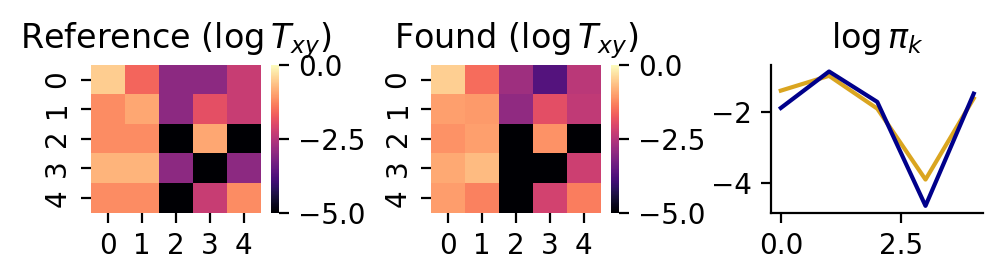

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

REF_LOG_TM = jnp.asarray([[ -0.51,  -1.61,  -3.  ,  -3.  ,  -2.3 ], [ -1.2 ,  -0.92,  -3.  ,  -1.9 ,  -2.3 ], [ -1.2 ,  -1.2 , -20.72,  -0.92, -20.72], [ -0.8 ,  -0.8 ,  -3.  , -20.72,  -3.  ], [ -1.2 ,  -1.2 , -20.72,  -2.3 ,  -1.2 ]])
REF_LOG_PI = jnp.asarray([-1.39, -0.97, -1.9 , -3.91, -1.61])

fig, axs = plt.subplots(1, 3, figsize=(5, 1.5), dpi=200)


ax = axs[0]
sns.heatmap(REF_LOG_TM, ax=ax, cmap="magma", vmin=-5, vmax=0)
ax.set_title("Reference $(\\log T_{xy})$")

ax = axs[1]
sns.heatmap(OPTIMAL_LOG_TM, ax=ax, cmap="magma", vmin=-5, vmax=0)
ax.set_title("Found $(\\log T_{xy})$")

ax = axs[2]
x_axis = jnp.arange(K)

ax.plot(x_axis, REF_LOG_PI, c="goldenrod")
ax.plot(x_axis, OPTIMAL_LOG_PI, c="darkblue")
ax.spines[["top", "right"]].set_visible(False)
ax.set_title("$\\log \\pi_k$")

fig.tight_layout()

As we have found the values of the parameters, we can use them to generate new data and attempt to predict the future.
(Well, under a very, very strong assumption: that the future works in the same manner as the past. More accurate description would be [*retrodict the past*](https://betanalpha.github.io/assets/case_studies/principled_bayesian_workflow.html#143_Posterior_Retrodiction_Checks).)

Bitney is going to spend tomorrow 7 hours at the campus.
We would like to know:

  - (a) The probability that he will visit the park tomorrow.
  - (b) How many number of hours he will spend in the library.

To do that, we can sample a large number (e.g., 1000) of trajectories and estimate these quantities basing on simulations. This is called the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method).

### Pseudorandom numbers in JAX

JAX generates pseudorandom numbers in a *different* way than NumPy or PyTorch.
For the overview of differences, see [this link](https://jax.readthedocs.io/en/latest/random-numbers.html).

The most important difference is that there is no generator object, but we rather provide a `key` array. The same key passed twice to the same distribution returns exactly the same output:

In [ ]:
key = jax.random.PRNGKey(2024)

probs = jnp.asarray([0.25, 0.25, 0.5])

output1 = jax.random.categorical(key, logits=jnp.log(probs))
output2 = jax.random.categorical(key, logits=jnp.log(probs))

print(f"{output1} is the same as {output2}")

2 is the same as 2


Hence, we should treat every `key` as an object which can be used only once. To generate distinct numbers we can split the key into subkeys:



In [ ]:
key = jax.random.PRNGKey(2024)

key, *subkeys = jax.random.split(key, 3)
# `key` is overridden with a new value
# `subkeys` is an array of shape 2 = 3-1.

probs = jnp.asarray([0.25, 0.25, 0.5])

output1 = jax.random.categorical(subkeys[0], logits=jnp.log(probs))
output2 = jax.random.categorical(subkeys[1], logits=jnp.log(probs))

print(f"There is a reasonable probability that first number ({output1}) is different from the second ({output2}).")

# If we want to do any further sampling, we should split `key` again

There is a reasonable probability that first number (2) is different from the second (1).


**Problem:** Implement a function using `for` loop that samples a trajectory of a given length.

In [ ]:
def sample_trajectory_for_loop(subkey, n: int, log_tm: Float[Array, "K K"], log_pi: Float[Array, " K"]) -> Int[Array, " n"]:
    """Samples a trajectory of length `n`."""
    keys = jax.random.split(subkey, n)

    x0 = jax.random.categorical(keys[0], log_pi)
    ys = [x0]

    carry = x0
    for key in keys[1:]:
      carry = jax.random.categorical(key, log_tm[carry])
      ys.append(carry)

    return jnp.asarray(ys)

key, subkey = jax.random.split(key)  # By default splits into two

trajectory_length = 7
print("Sampled trajectory:")
print(sample_trajectory_for_loop(subkey, trajectory_length, OPTIMAL_LOG_TM, OPTIMAL_LOG_PI))

Sampled trajectory:
[1 4 1 0 0 0 0]


Great! Now we can answer the problem:

**Problem:** Bitney is going to spend tomorrow 7 hours at the campus. Generate 1000 trajectories. of length 7 and estimate:

  - (a) The probability that he will visit the park (location 3) tomorrow.
  - (b) How much time he is expected to spend in the library (location 0) tomorrow.

In [ ]:
def calculate_probability_visit_park(trs: Int[Array, "batch n"]) -> float:
  """Returns the probability that there is at least one "3" in the trajectory."""
  return ((trs == 3).sum(axis=1) > 0).mean()

def calculate_mean_number_of_library_hours(trs: Int[Array, "batch n"]) -> float:
  """Returns the expected number of "0" entries in a trajectory."""
  return (trs == 0).sum(axis=1).mean()


num_trajectories = 1_000

key, *subkeys = jax.random.split(key, num_trajectories + 1)
trajectories = jnp.asarray([
    sample_trajectory_for_loop(subkey, trajectory_length, OPTIMAL_LOG_TM, OPTIMAL_LOG_PI)
    for subkey in subkeys
])

print(f"Probability of visiting the park: {calculate_probability_visit_park(trajectories):.2f}")
print(f"Expected library time:            {calculate_mean_number_of_library_hours(trajectories):.2f}")

Probability of visiting the park: 0.47
Expected library time:            2.93


Great! This works. However, we can speed this up. Currently we are using:

  - A `for` loop to sample the trajectories. For long trajectories this is slow.
  - A Python list comprehension to sample multiple trajectories of the same length. For a large number of trajectories this is slow.

The JAX-native solutions would be:

  - A `jax.lax.scan` to replace the `for` loop.
  - A `jax.vmap` to replace the list comprehension.

**Problem:** Implement a function sampling the trajectories in JAX using `jax.lax.scan`.

In [ ]:
def sample_trajectory_the_jax_way(subkey, n: int, log_tm: Float[Array, "K K"], log_pi: Float[Array, " K"]) -> Int[Array, " n"]:
    """Samples a trajectory of length `n`."""
    keys = jax.random.split(subkey, n)

    def scan_fn(carry: int, key):
        state = carry
        new_state = jax.random.categorical(key, log_tm[state])
        return new_state, new_state

    x0 = jax.random.categorical(keys[0], log_pi)
    _, trajectory = jax.lax.scan(scan_fn, x0, keys[1:])
    trajectory = jnp.concatenate((jnp.array([x0]), trajectory))

    return trajectory


key, key2 = jax.random.split(key)
subkeys = jax.random.split(key2, num_trajectories)

trajectories = jax.vmap(sample_trajectory_the_jax_way, in_axes=(0, None, None, None))(subkeys, 7, OPTIMAL_LOG_TM, OPTIMAL_LOG_PI)


print(f"Probability of visiting the park: {calculate_probability_visit_park(trajectories):.2f}")
print(f"Expected library time:            {calculate_mean_number_of_library_hours(trajectories):.2f}")

Probability of visiting the park: 0.46
Expected library time:            2.93


Hopefully, we see that the estimates of the quantities of interest are similar. As Monte Carlo standard error is scaling as $O(1/\sqrt{N})$, increasing the number of sampled trajectories can yield closer estimates.


## Summary

Congratulations – you have finished the workshop!

To reiterate the most important points from this notebook:

  - Do use the `jax.lax` alternatives for the `for` loop and `if/else` whenever possible.
  - Start with a Python function you trust, and then use it to test a JAX alternative. I usually put the Python "baseline" functions in [the unit tests](https://docs.pytest.org/).
  - As JAX works with arrays of fixed shapes, use *padding* to resize the objects into just a few fixed shapes. You may need to write a different function (which ignores the padded values), e.g., by using masking.
  - JAX supports operations on Pytrees. For complex data structures, such as these supported by [Equinox](https://docs.kidger.site/equinox/all-of-equinox/) this is great. But remember that a single array is much better than a Pytree consisting of list of arrays.


### Where to go from here?

Probably the best way to continue the JAX adventure is to start using it in your own projects. However, if you want to start a new side project right now, the following ideas may be interesting:

  - Once you have a neural network represented as a Pytree ([Equinox](https://docs.kidger.site/equinox/all-of-equinox/)), you have all the building blocks for building diffusion models. See the [blackout diffusion](https://arxiv.org/abs/2305.11089) paper and implement sampling in JAX (or the training). Other diffusion-based models are also easy to implement in JAX.
  - In case you want to drop the time-homogeneous Markov assumption, you may consider an autoregressive model: $P(X_0, \dotsc, X_{n-1}) = P(X_0)P(X_1\mid X_0) P(X_2\mid X_1, X_0) \cdots P(X_{n-1}\mid X_{n-2}, \dots, X_{1}, X_0)$. In this case padding is a typical technique, together with masking. You can take a look at the [JAX-based PaLM implementation](https://github.com/lucidrains/PaLM-jax) or [Levanter](https://github.com/stanford-crfm/levanter), a JAX-based framework for building large language models.
  - If you are interested in doing Bayesian inference over the parameters $T$ and $\pi$, rather than optimisation, see the [NumPyro](https://num.pyro.ai/) and [BlackJAX](https://blackjax-devs.github.io/blackjax/) packages. Below there is a prototype showing how easy Bayesian inference is in JAX (once you can build likelihood function).


## Bonus: Bayesian inference in JAX


As we have the likelihood, i.e., $P(\text{data}\mid \pi, T)$, if we put a prior $P(\pi, T)$, we can use the [Bayes' rule](https://en.wikipedia.org/wiki/Bayes%27_theorem) and obtain the posterior, $P(\pi, T \mid \text{data})$:
$$P(\pi, T \mid \text{data}) = \frac{ P(\text{data}\mid \pi, T)\, P(\pi, T) }{P(\text{data})},$$

which quantifies how probable different solutions are. This approach to estimation is called *Bayesian inference* and allows us to express any uncertainty in parameter estimates using the posterior probability distribution.

We will put the uniform probability distribution over each simplex, i.e., $\text{Dirichlet}(1, 1, \dotsc, 1)$ distribution.

In [ ]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS

def model(K):
    # Sample pi from a uniform distribution over the probability simplex
    pi = numpyro.sample("pi", dist.Dirichlet(jnp.ones(K)))

    # Sample T from K Dirichlet distributions
    T = numpyro.sample("T", dist.Dirichlet(jnp.ones(K)).expand([K]))

    numpyro.factor("likelihood",
        calculate_total_loglikelihood_the_jax_way(PADDED_TRAJECTORIES, log_tm=jnp.log(T), log_pi=jnp.log(pi))
    )

    return pi, T


nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000, num_chains=4)
mcmc.run(jax.random.PRNGKey(0), K)
mcmc.print_summary()

<ipython-input-46-3dcc5bf2a126>:20: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000, num_chains=4)
sample: 100%|██████████| 1500/1500 [00:01<00:00, 786.48it/s, 7 steps of size 4.72e-01. acc. prob=0.90]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
    T[0,0]      0.60      0.03      0.60      0.56      0.66   4579.02      1.00
    T[0,1]      0.22      0.03      0.21      0.17      0.26   4641.42      1.00
    T[0,2]      0.07      0.02      0.06      0.04      0.09   6929.09      1.00
    T[0,3]      0.03      0.01      0.03      0.01      0.05   5026.49      1.00
    T[0,4]      0.09      0.02      0.09      0.06      0.12   5816.96      1.00
    T[1,0]      0.36      0.03      0.36      0.31      0.42   6628.09      1.00
    T[1,1]      0.34      0.03      0.34      0.29      0.40   5821.53      1.00
    T[1,2]      0.06      0.02      0.05      0.03      0.08   4698.42      1.00
    T[1,3]      0.15      0.03      0.15      0.11      0.19   5183.79      1.00
    T[1,4]      0.10      0.02      0.09      0.06      0.13   5181.61      1.00
    T[2,0]      0.31      0.07      0.30      0.19      0.42   5235.99      1.00
    T[2,1]      0.35      0

With just a few lines of code more, we could do Bayesian inference, which provides estimates together with uncertainty!
We can use these samples to generate the predictive samples (i.e., sample the trajectories). In many cases, they will show higher variability than these corresponding to a single point estimate.

Bayesian data analysis doesn't end up with inference. For discussion of model checking and other topics, we refer to [BDA3](https://stat.columbia.edu/~gelman/book/) and [Statistical rethinking](https://youtu.be/FdnMWdICdRs?feature=shared).